In [79]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [80]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px  # For easier rendering
import plotly.io as pio
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential  # Import Sequential
from tensorflow.keras import Model  # Import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam



In [81]:
df = pd.read_csv("GOOG.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.4700,713.1200,716.480,1306065,718.27,722.4700,713.1200,716.480,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.9800,717.3100,719.000,1214517,718.92,722.9800,717.3100,719.000,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.6500,703.2600,714.910,1982471,710.36,716.6500,703.2600,714.910,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.8200,688.4515,708.650,3402357,691.72,708.8200,688.4515,708.650,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.4800,693.4100,698.770,2082538,693.71,702.4800,693.4100,698.770,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GOOG,2021-05-20 00:00:00+00:00,2356.09,2360.3400,2321.0900,2328.040,1191593,2356.09,2360.3400,2321.0900,2328.040,1191593,0,1
1243,GOOG,2021-05-21 00:00:00+00:00,2345.10,2368.9999,2342.3700,2365.990,1141632,2345.10,2368.9999,2342.3700,2365.990,1141632,0,1
1244,GOOG,2021-05-24 00:00:00+00:00,2406.67,2418.4800,2360.1100,2367.000,1062189,2406.67,2418.4800,2360.1100,2367.000,1062189,0,1
1245,GOOG,2021-05-25 00:00:00+00:00,2409.07,2432.8900,2402.9900,2420.000,941928,2409.07,2432.8900,2402.9900,2420.000,941928,0,1


In [82]:
df['date'] = pd.to_datetime(df['date']).dt.date
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.4700,713.1200,716.480,1306065,718.27,722.4700,713.1200,716.480,1306065,0,1
1,GOOG,2016-06-15,718.92,722.9800,717.3100,719.000,1214517,718.92,722.9800,717.3100,719.000,1214517,0,1
2,GOOG,2016-06-16,710.36,716.6500,703.2600,714.910,1982471,710.36,716.6500,703.2600,714.910,1982471,0,1
3,GOOG,2016-06-17,691.72,708.8200,688.4515,708.650,3402357,691.72,708.8200,688.4515,708.650,3402357,0,1
4,GOOG,2016-06-20,693.71,702.4800,693.4100,698.770,2082538,693.71,702.4800,693.4100,698.770,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GOOG,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593,2356.09,2360.3400,2321.0900,2328.040,1191593,0,1
1243,GOOG,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632,2345.10,2368.9999,2342.3700,2365.990,1141632,0,1
1244,GOOG,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189,2406.67,2418.4800,2360.1100,2367.000,1062189,0,1
1245,GOOG,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928,2409.07,2432.8900,2402.9900,2420.000,941928,0,1


In [83]:
df.drop(columns=['symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], axis=1,inplace=True)
df


,date,close,high,low,open,volume
0,2016-06-14,718.27,722.4700,713.1200,716.480,1306065
1,2016-06-15,718.92,722.9800,717.3100,719.000,1214517
2,2016-06-16,710.36,716.6500,703.2600,714.910,1982471
3,2016-06-17,691.72,708.8200,688.4515,708.650,3402357
4,2016-06-20,693.71,702.4800,693.4100,698.770,2082538
...,...,...,...,...,...,...
1242,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593
1243,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632
1244,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189
1245,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928


In [84]:
df.duplicated().values.any()

False

In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1247 non-null   object 
 1   close   1247 non-null   float64
 2   high    1247 non-null   float64
 3   low     1247 non-null   float64
 4   open    1247 non-null   float64
 5   volume  1247 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 58.6+ KB


In [86]:
df.describe()

,close,high,low,open,volume
count,1247.000000,1247.00000,1247.000000,1247.000000,1.247000e+03
mean,1205.396528,1216.50253,1193.300438,1204.342149,1.604924e+06
std,366.846916,371.28821,362.195549,365.921763,6.976014e+05
min,668.260000,672.30000,663.284000,671.000000,3.467530e+05
25%,957.580000,962.08000,950.725000,957.165000,1.174306e+06
50%,1129.990000,1141.70000,1116.670000,1127.520000,1.415473e+06
75%,1350.690000,1364.08500,1342.725000,1350.520000,1.815700e+06
max,2433.530000,2452.37800,2412.515000,2420.000000,6.207027e+06


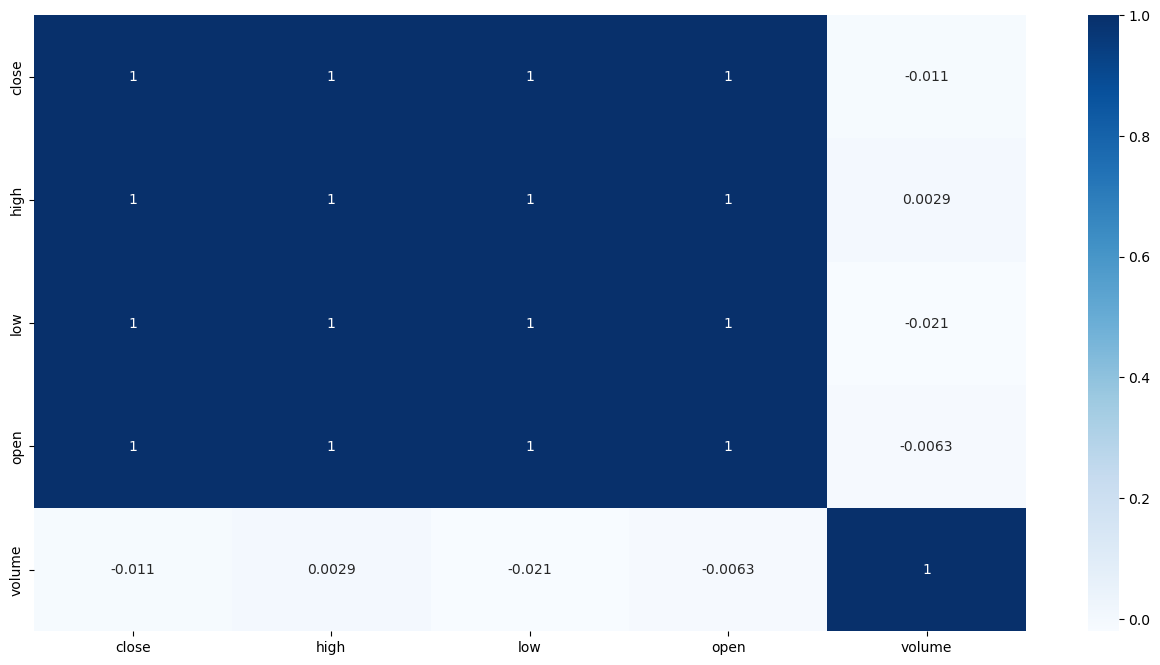

In [87]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.show()

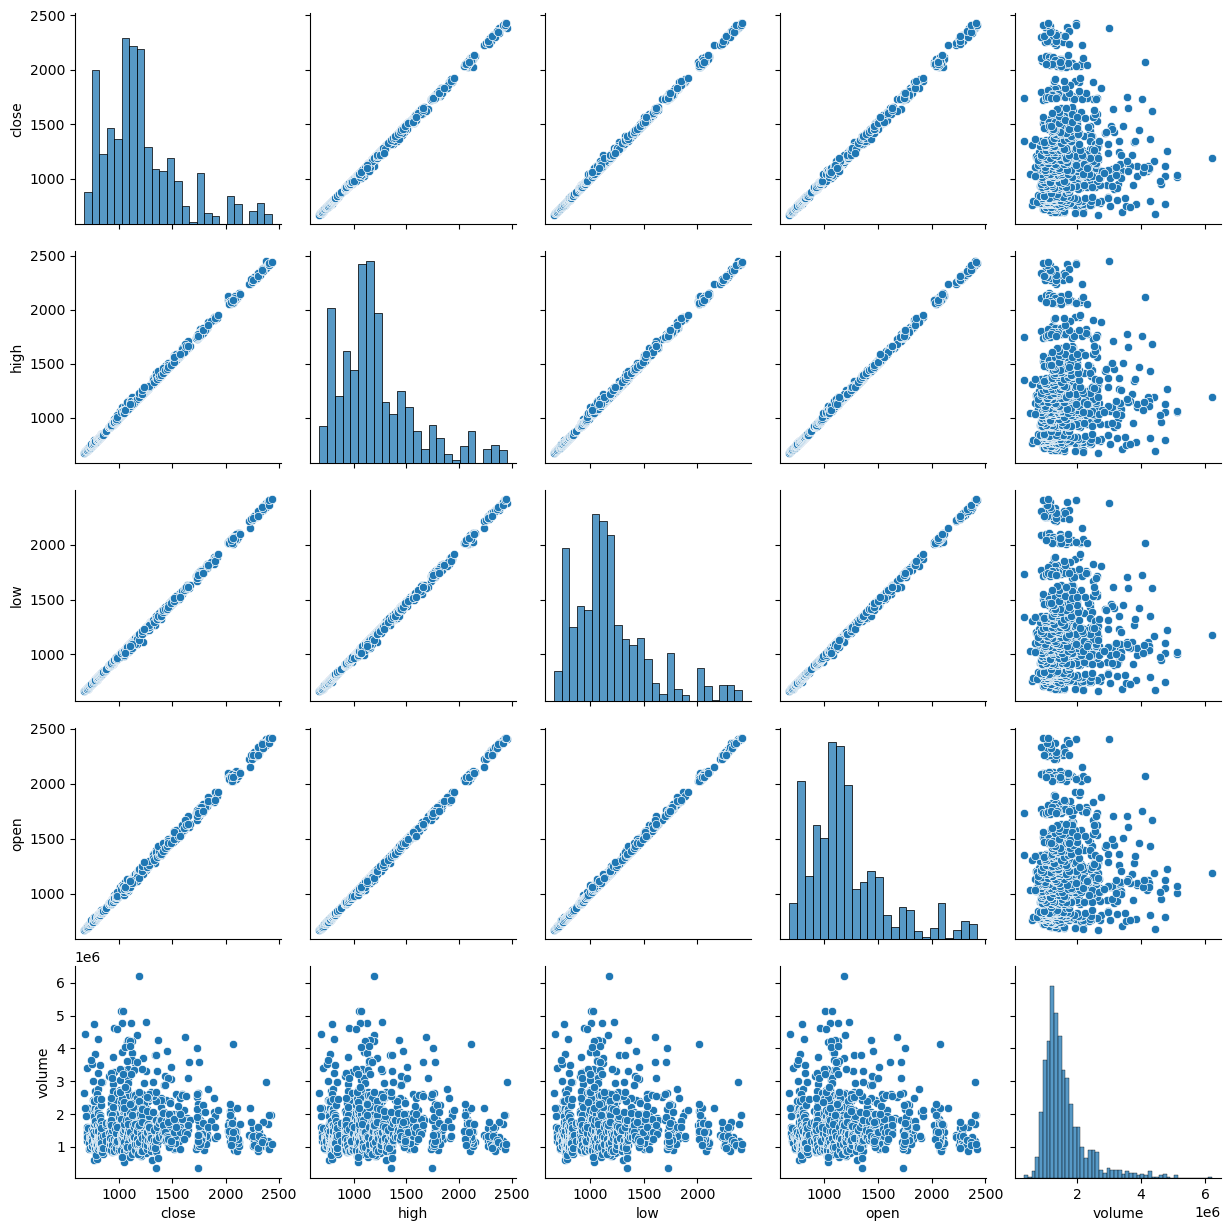

In [88]:
sns.pairplot(df)


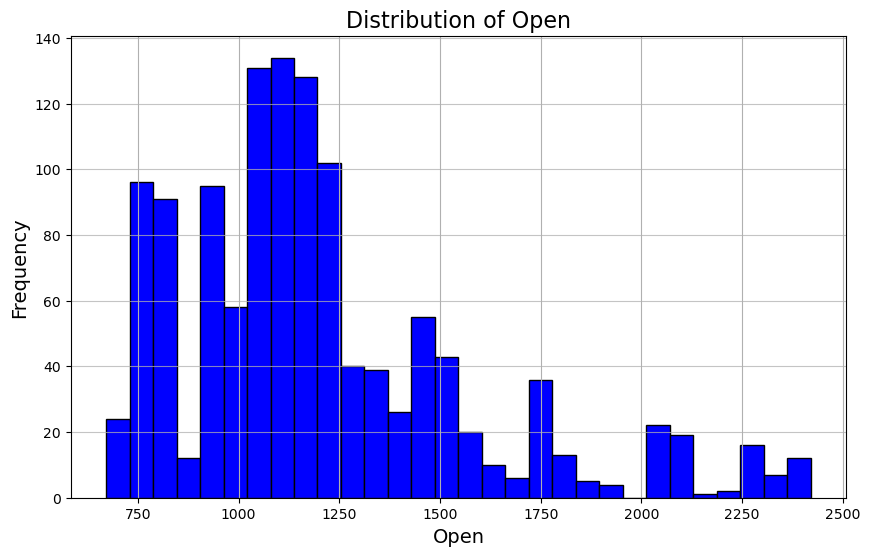

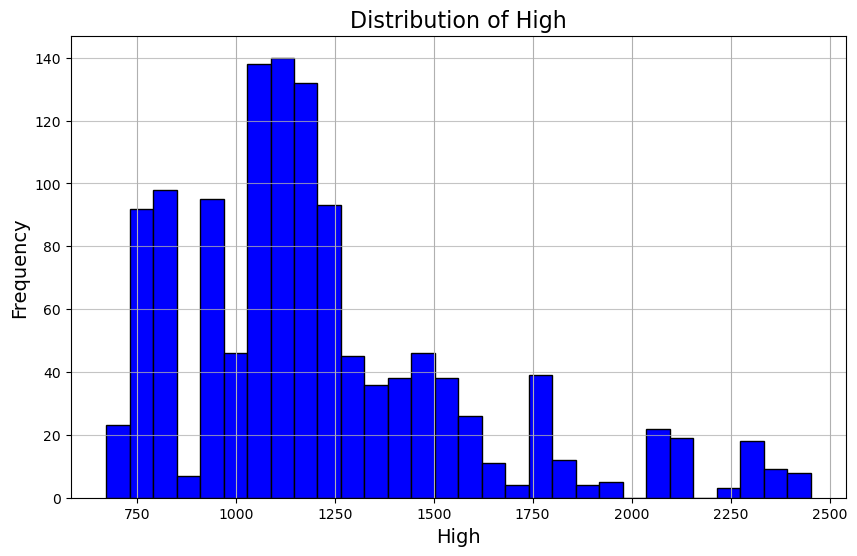

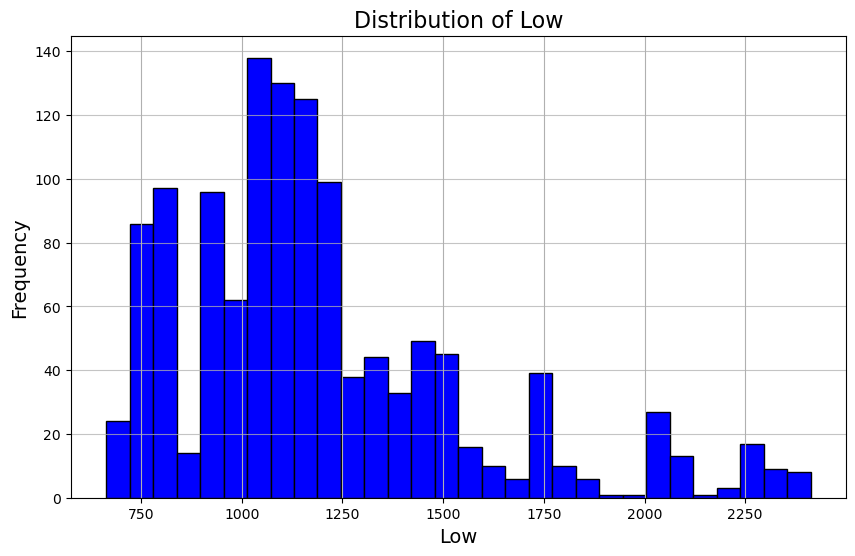

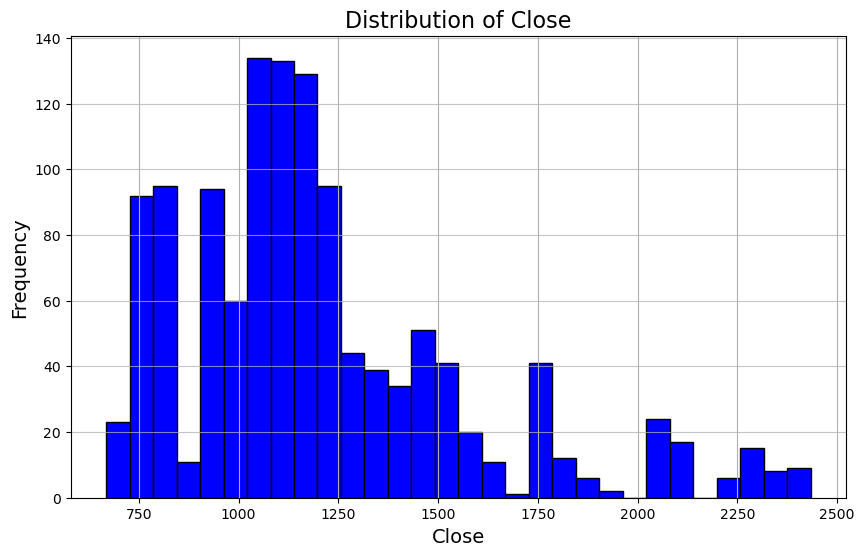

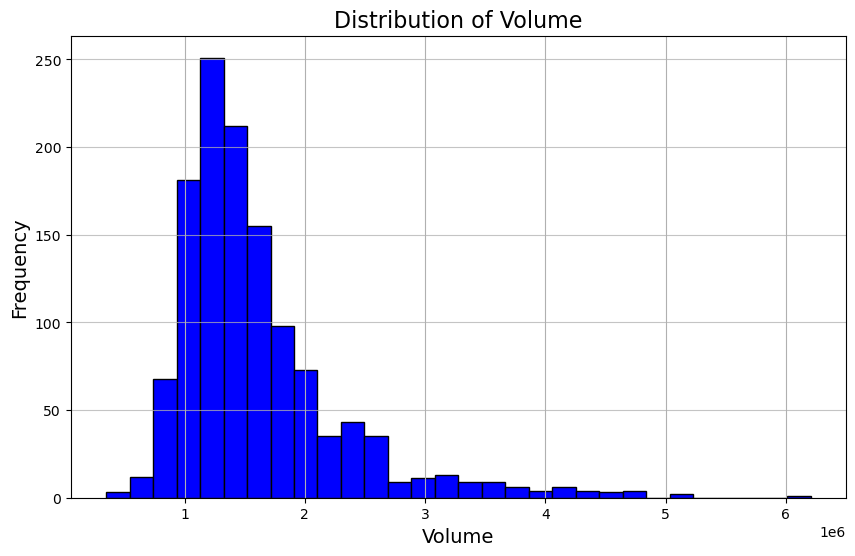

In [89]:
columns_to_plot = ['open', 'high', 'low', 'close', 'volume']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

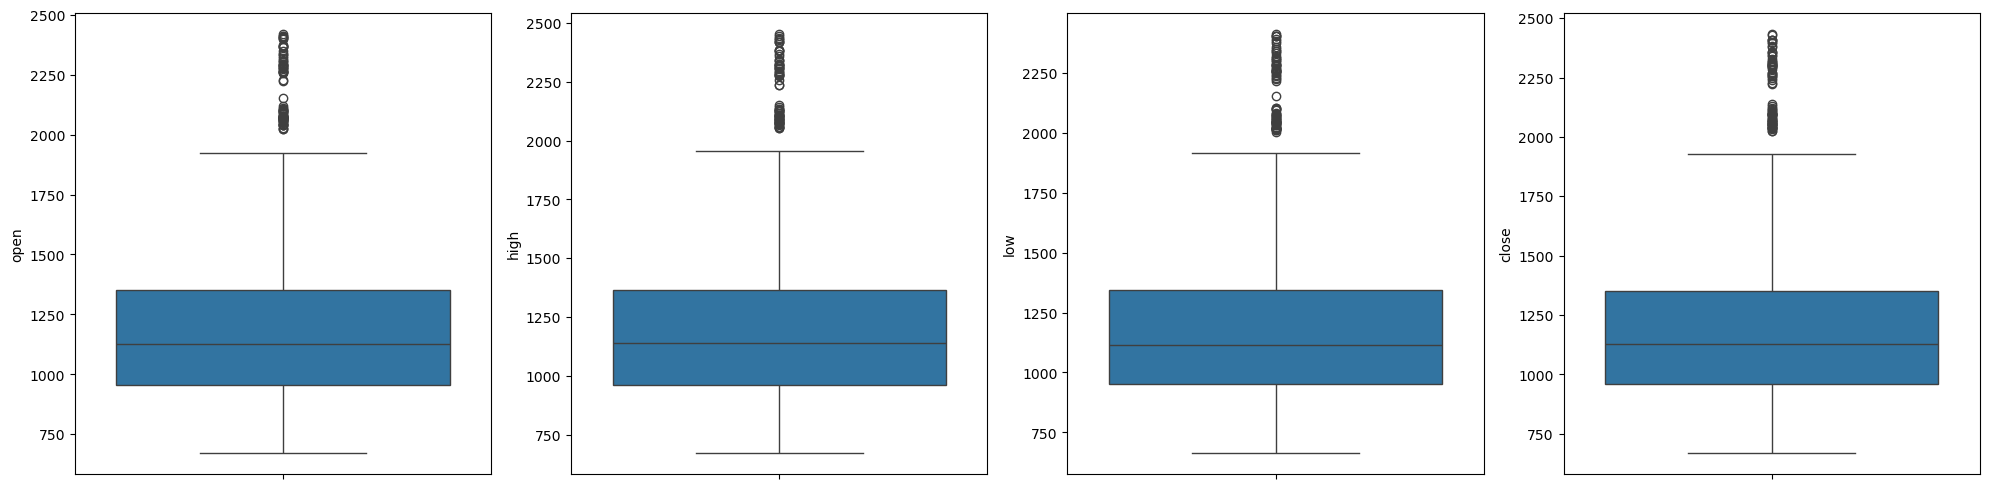

In [90]:
f, axes = plt.subplots(1, 4, figsize=(20,5))
sns.boxplot(y='open', data=df, ax=axes[0])
sns.boxplot(y='high', data=df, ax=axes[1])
sns.boxplot(y='low', data=df, ax=axes[2])
sns.boxplot(y='close', data=df, ax=axes[3])
plt.tight_layout()
plt.show()

In [91]:
scaler = StandardScaler()


why standard deviation ?

x_scaled= x−μ/standard_deviation

This scales the features to have a mean of 0 and a standard deviation of 1, ensuring that the model treats all features equally.

Neural networks often initialize weights using distributions (e.g., Gaussian or uniform) whose standard deviation depends on the number of inputs/outputs in a layer (e.g., He initialization or Xavier initialization).
Why?
Proper weight initialization ensures that gradients neither explode nor vanish during backpropagation. The standard deviation ensures the network starts training with appropriately scaled activations.



Introduced By: Xavier Glorot and Yoshua Bengio in 2010.
Purpose: Designed for activation functions like sigmoid or tanh. These functions tend to squash outputs into small ranges, making them susceptible to vanishing gradients.
Key Idea: The weights are initialized so that the variance of activations remains the same across layers, ensuring stable forward and backward propagation.


Introduced By: Kaiming He et al. in 2015.
Purpose: Specifically designed for activation functions like ReLU and its variants, which are more prone to exploding gradients if not initialized properly.
Key Idea: ReLU activation passes only positive values, so the variance of activations can increase. He initialization adjusts for this by scaling the weights more appropriately.



In regression, the standard deviation of residuals (errors) helps assess model performance:
The residual standard deviation quantifies how well the model fits the data.
A smaller standard deviation indicates that the model predictions are closer to the true values.



A small standard deviation indicates that the model's predictions are close to the real values because it reflects low variability or spread in the errors (residuals) between the predicted and actual values.
​


In [92]:
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']))

scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['number']).columns)

df[df.select_dtypes(include=['number']).columns] = scaled_df

In [93]:
df.head()

,date,close,high,low,open,volume
0,2016-06-14,-1.328407,-1.331124,-1.326281,-1.333777,-0.428581
1,2016-06-15,-1.326634,-1.329750,-1.314708,-1.326887,-0.559866
2,2016-06-16,-1.349978,-1.346806,-1.353515,-1.338069,0.541425
3,2016-06-17,-1.400809,-1.367903,-1.394417,-1.355183,2.577625
4,2016-06-20,-1.395383,-1.384985,-1.380721,-1.382194,0.684927


In [94]:
df.describe()

,close,high,low,open,volume
count,1.247000e+03,1.247000e+03,1.247000e+03,1.247000e+03,1.247000e+03
mean,-4.558414e-17,-1.367524e-16,-9.116827e-17,-1.367524e-16,1.424504e-16
std,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00
min,-1.464785e+00,-1.466303e+00,-1.463930e+00,-1.458115e+00,-1.804290e+00
25%,-6.758022e-01,-6.855176e-01,-6.700048e-01,-6.757628e-01,-6.175315e-01
50%,-2.056356e-01,-2.015484e-01,-2.116569e-01,-2.100257e-01,-2.716831e-01
75%,3.962191e-01,3.976471e-01,4.127177e-01,3.996387e-01,3.022665e-01
max,3.349152e+00,3.329950e+00,3.367528e+00,3.323513e+00,6.599686e+00


In [95]:
figure = go.Figure(data=[go.Candlestick(x=df["date"],
                                        open=df["open"], high=df["high"],
                                        low=df["low"], close=df["close"])])

figure.update_layout(title="Google Stock Price Analysis after scalling", xaxis_rangeslider_visible=False)
figure.show()

In [96]:
x=df[['open','high','low','volume']].values
y=df['close'].values

In [97]:
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)



In [98]:
X_train.shape[1]

4

In [99]:
model_dropout = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dropout(0.6),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='linear')
])


In [100]:
optimizer = Adam(learning_rate=1e-4)
model_dropout.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history_dropout = model_dropout.fit(X_train, y_train, epochs=50, batch_size=32, 
                                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 1.6253 - mae: 0.9334 - val_loss: 1.3234 - val_mae: 0.9009
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 1.5185 - mae: 0.8921 - val_loss: 1.1524 - val_mae: 0.8354
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 1.3976 - mae: 0.8377 - val_loss: 1.0032 - val_mae: 0.7730
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 1.2093 - mae: 0.7805 - val_loss: 0.8741 - val_mae: 0.7158
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 1.1765 - mae: 0.7617 - val_loss: 0.7608 - val_mae: 0.6610
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 1.1142 - mae: 0.7219 - val_loss: 0.6665 - val_mae: 0.6125
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9791 - mae: 0.6837 - val_loss: 0.5845 - val_mae: 0.5687
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.9473 - mae: 0.6

In [101]:
from sklearn.metrics import r2_score

# Evaluate model without dropout on the test set
test_loss_no_dropout = model_dropout.evaluate(X_test, y_test)

# Make predictions for training, test, and validation sets
y_train_pred_no_dropout = model_dropout.predict(X_train)
y_test_pred_no_dropout = model_dropout.predict(X_test)
y_val_pred_no_dropout = model_dropout.predict(X_val)

# Calculate R² for training, validation, and test sets
train_r2_no_dropout = r2_score(y_train, y_train_pred_no_dropout)
test_r2_no_dropout = r2_score(y_test, y_test_pred_no_dropout)
val_r2_no_dropout = r2_score(y_val, y_val_pred_no_dropout)  # Corrected here

# Print R² values for each set
print(f'Training R² (Dropout): {train_r2_no_dropout}')
print(f'Test R² (Dropout): {test_r2_no_dropout}')
print(f'Validation R² (Dropout): {val_r2_no_dropout}')


7/7 [==============================] - 0s 1ms/step
Training R² (Dropout): 0.9580110460088819
Test R² (Dropout): 0.9572478205436561
Validation R² (Dropout): 0.958032293443583


In [102]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [103]:
import shap
import numpy as np
import warnings

# Suppress warnings (optional)
warnings.filterwarnings("ignore", category=UserWarning)

# Compute SHAP values
explainer = shap.DeepExplainer(model_dropout, X_train) 
shap_values = explainer.shap_values(X_test)

shap_importance = np.abs(shap_values).mean(axis=0)

shap_importance /= shap_importance.sum()

print("SHAP Feature Importances:", shap_importance)



SHAP Feature Importances: [[0.38883272]
 [0.28306103]
 [0.30249699]
 [0.02560926]]


In [104]:
shap_importance.shape

(4, 1)

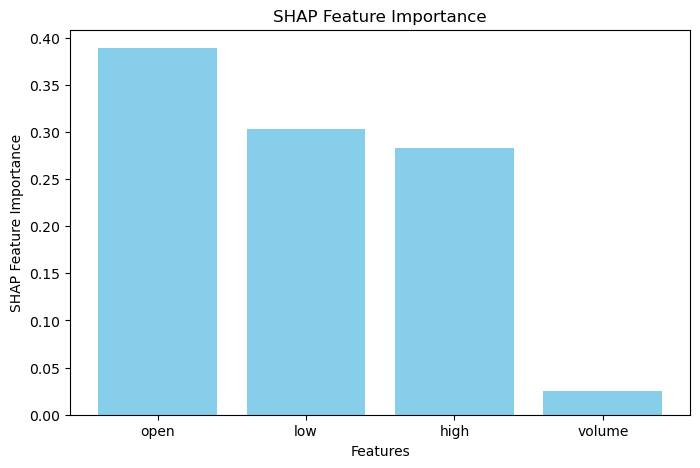

In [105]:
import matplotlib.pyplot as plt
import numpy as np

features = ['open', 'high', 'low', 'volume']
shap_importance = np.ravel(shap_importance)  

sorted_indices = np.argsort(shap_importance)[::-1]  
sorted_features = np.array(features)[sorted_indices]  
sorted_importance = shap_importance[sorted_indices]


plt.figure(figsize=(8, 5))
plt.bar(sorted_features, sorted_importance, color="skyblue")
plt.xlabel("Features")
plt.ylabel("SHAP Feature Importance")
plt.title("SHAP Feature Importance")
plt.show()


In [106]:
model_dropout.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


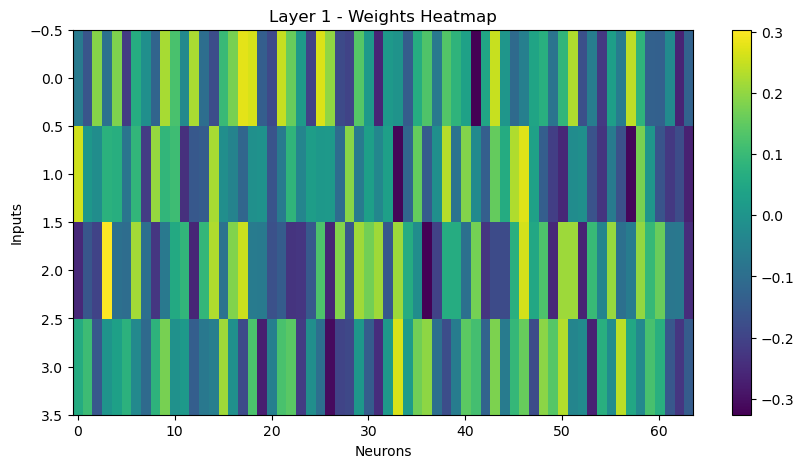

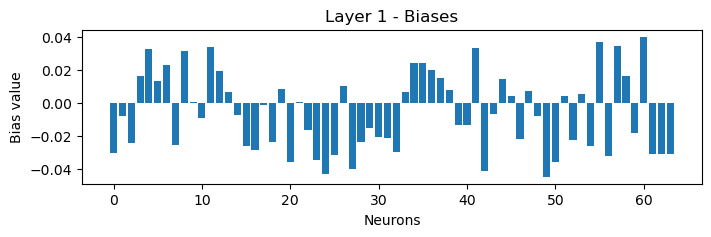

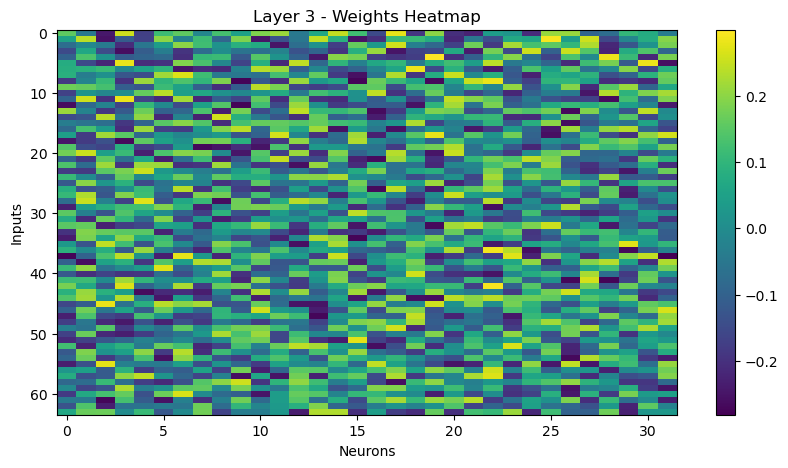

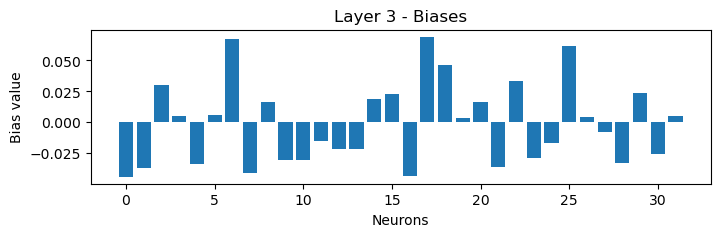

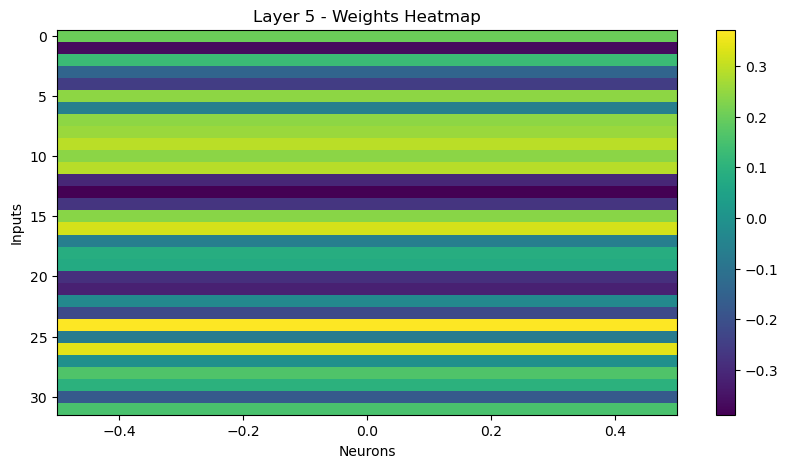

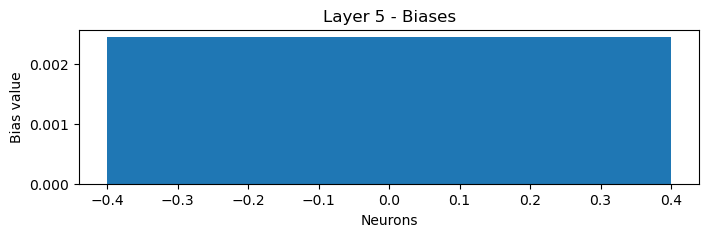

In [107]:
import matplotlib.pyplot as plt
import numpy as np

for i, layer in enumerate(model_dropout.layers):
    if len(layer.get_weights()) > 0:  # Only process layers with weights
        weights, biases = layer.get_weights()
        
        plt.figure(figsize=(10, 5))
        plt.title(f"Layer {i+1} - Weights Heatmap")
        plt.imshow(weights, cmap='viridis', aspect='auto')
        plt.colorbar()
        plt.xlabel("Neurons")
        plt.ylabel("Inputs")
        plt.show()
        
        # Visualize biases
        plt.figure(figsize=(8, 2))
        plt.title(f"Layer {i+1} - Biases")
        plt.bar(range(len(biases)), biases)
        plt.xlabel("Neurons")
        plt.ylabel("Bias value")
        plt.show()


In [108]:
model_no_dropout = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1,activation='linear')
])


In [109]:
model_no_dropout.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


In [110]:
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=50, batch_size=32, 
                                          validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.5586 - mae: 0.4573 - val_loss: 0.1920 - val_mae: 0.2575
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0683 - mae: 0.1407 - val_loss: 0.0121 - val_mae: 0.0689
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0060 - mae: 0.0571 - val_loss: 0.0030 - val_mae: 0.0450
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0030 - mae: 0.0446 - val_loss: 0.0020 - val_mae: 0.0349
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0024 - mae: 0.0367 - val_loss: 0.0016 - val_mae: 0.0297
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0332 - val_loss: 0.0015 - val_mae: 0.0281
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0019 - mae: 0.0315 - val_loss: 0.0014 - val_mae: 0.0268
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - mae: 0.0

In [111]:
from sklearn.metrics import r2_score

# Evaluate model without dropout on the test set
test_loss_no_dropout = model_no_dropout.evaluate(X_test, y_test)

# Make predictions for training, test, and validation sets
y_train_pred_dropout = model_no_dropout.predict(X_train)
y_test_pred_dropout = model_no_dropout.predict(X_test)
y_val_pred_dropout = model_no_dropout.predict(X_val)

# Calculate R² for training, validation, and test sets
train_r2_dropout = r2_score(y_train, y_train_pred_dropout)
test_r2_dropout = r2_score(y_test, y_test_pred_dropout)
val_r2_dropout = r2_score(y_val, y_val_pred_dropout)  # Corrected here

# Print R² values for each set
print(f'Training R² (Dropout): {train_r2_dropout}')
print(f'Test R² (Dropout): {test_r2_dropout}')
print(f'Validation R² (Dropout): {val_r2_dropout}')


7/7 [==============================] - 0s 3ms/step
Training R² (Dropout): 0.9991766928770273
Test R² (Dropout): 0.9989003606860922
Validation R² (Dropout): 0.9993797036658563


Reasons Why Test Accuracy Can Be Greater Than Training Accuracy:
Regularization Effects:

If your model is using regularization techniques (e.g., L1/L2 regularization, dropout), it may perform better on unseen data (test set) by reducing overfitting on the training data.
Regularization penalizes overly complex models and can make them generalize better.


Feature	           ReLU	                                 Linear Activation
Purpose	 Adds non-linearity in hidden layers	       Used in the output layer for regression
Use Case	 Hidden layers in regression tasks	         Final output in regression tasks
output           0 -> infinty                             negative_infinty -> infinty






Sigmoid: Binary classification tasks for outputs as probabilities.
Softmax: Multi-class classification tasks for categorical probabilities.
Tanh: When outputs should be centered around zero.

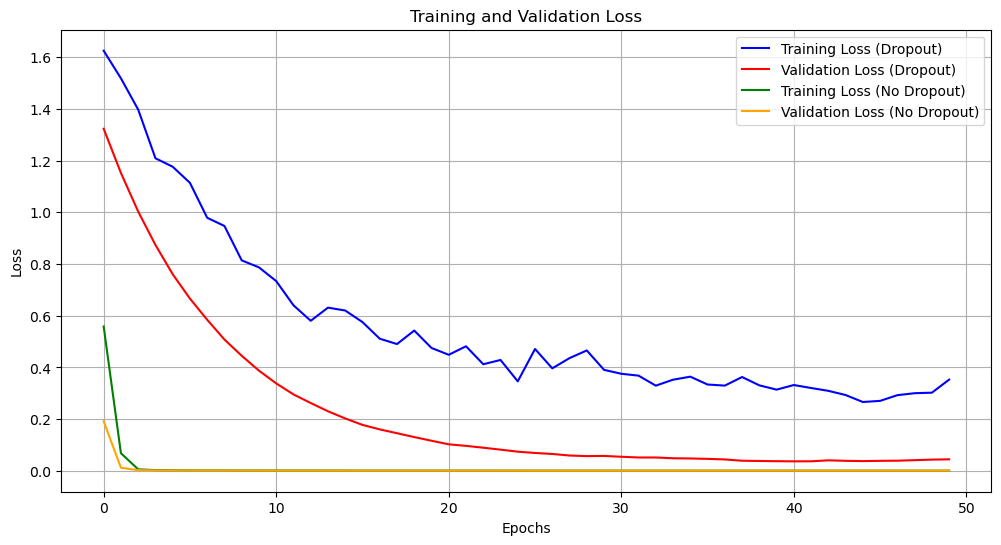

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(history_dropout.history['loss'], label='Training Loss (Dropout)', color='blue')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss (Dropout)', color='red')
plt.plot(history_no_dropout.history['loss'], label='Training Loss (No Dropout)', color='green')
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss (No Dropout)', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

8/8 [==============================] - 0s 1ms/step


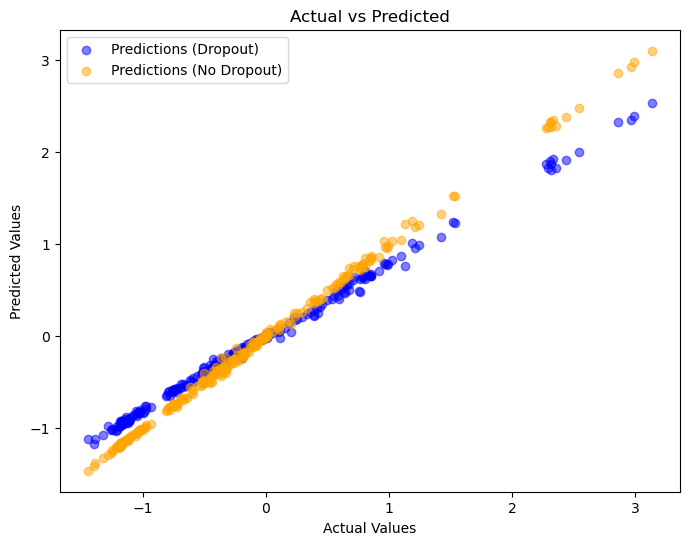

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model_dropout.predict(X_test), label='Predictions (Dropout)', alpha=0.5, color='blue')
plt.scatter(y_test, model_no_dropout.predict(X_test), label='Predictions (No Dropout)', alpha=0.5, color='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

With Dropout: Although the training loss is higher, the validation loss is lower and more stable. This indicates that the model is not simply memorizing the training data but is learning patterns that generalize well to new, unseen data.

Without Dropout: The training loss decreases rapidly, suggesting the model is overfitting to the training data. However, the validation loss is higher and less stable, indicating poor generalization to new data.




Model with Dropout (Blue and Red Curves):
Training Loss (Blue Curve): The training loss is consistently higher than the model without dropout, indicating regularization through dropout. This suggests that the model avoids overfitting during training.
Validation Loss (Red Curve): The validation loss decreases and stabilizes at a reasonably low value, indicating good generalization to unseen data.
Model without Dropout (Green and Orange Curves):
Training Loss (Green Curve): The training loss is very low, approaching zero quickly. This indicates that the model without dropout fits the training data very well.
Validation Loss (Orange Curve): The validation loss is slightly lower than the dropout model's validation loss. However, the absence of dropout increases the risk of overfitting, especially if the dataset is not large or diverse.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the model (replace with actual model loading code)
# model_dropout = load_model()  # Replace with actual loading method if needed

# Load new data (replace with the actual file path)
new_data = pd.read_csv("unseen_data.csv")

new_data_features = new_data[['open', 'high', 'low', 'volume']]

scaler = StandardScaler()  
new_data_scaled = scaler.fit_transform(new_data_features) 


predictions_scaled = model_dropout.predict(new_data_scaled)  

close_scaler = StandardScaler()  
close_scaler.fit(new_data[['close']])  

predictions_unscaled = close_scaler.inverse_transform(predictions_scaled.reshape(-1, 1))





new_data['predicted_close'] = predictions_unscaled

if 'close' in new_data.columns:
    r2 = r2_score(new_data['close'], predictions_unscaled)
    
    print(f"R² score on new data: {r2}")
else:
    print("Actual 'close' values not found for R² evaluation.")

print(new_data[['date', 'predicted_close']])


1/1 [==============================] - 0s 27ms/step
R² score on new data: 0.8760370906154314
                         date  predicted_close
0   2021-05-27 00:00:00+00:00      2434.714111
1   2021-05-28 00:00:00+00:00      2425.853516
2   2021-06-01 00:00:00+00:00      2429.271973
3   2021-06-02 00:00:00+00:00      2434.276367
4   2021-06-03 00:00:00+00:00      2405.936279
5   2021-06-04 00:00:00+00:00      2435.677246
6   2021-06-07 00:00:00+00:00      2454.875000
7   2021-06-08 00:00:00+00:00      2479.558594
8   2021-06-09 00:00:00+00:00      2491.814697
9   2021-06-10 00:00:00+00:00      2498.275879
10  2021-06-11 00:00:00+00:00      2510.102783
